**Sistem Rekomendasi Tempat Wisata di Indonesia -Submission Machine Learning Terapan**

Oleh: Karimuddin Hakim Hasibuan

# Menyiapkan dataset

Pada tahapan ini dataset akan diimport ke dalam google colab melalui kaggle. Tujuannya untuk menggunakan dataset sebagai data yang akan menjadi model sistem rekomendasi.

In [ ]:
# import kredential akun dari kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karimhasibuan","key":"7d5ee7965ad80e500222fdf95bf66cfb"}'}

In [ ]:
# mengatur akses kredential akun kaggle agar dapat menggunakan API Kaggle untuk mengunduh dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# mengunduh dataset dari kaggle
!kaggle datasets download -d aprabowo/indonesia-tourism-destination

  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 103MB/s]


In [ ]:
# mengekstrak file zip dataset agar dapat digunakan
import zipfile
zip_ref = zipfile.ZipFile('indonesia-tourism-destination.zip', 'r')
zip_ref.extractall('')
zip_ref.close()

In [ ]:
# menyimpan masing-masing file ke dalam variabel dataframe
import pandas as pd

df_package_tourism = pd.read_csv('/content/package_tourism.csv')
df_tourism_rating = pd.read_csv('/content/tourism_rating.csv')
df_tourism_with_id = pd.read_csv('/content/tourism_with_id.csv')
df_user = pd.read_csv('/content/user.csv')

In [ ]:
# menampilkan 5 data teratas untuk data package_tourism

print(df_package_tourism.head())

   Package     City         Place_Tourism1      Place_Tourism2  \
0        1  Jakarta      Pasar Tanah Abang        Taman Ayodya   
1        2  Jakarta      Pasar Tanah Abang  Pasar Taman Puring   
2        3  Jakarta  Perpustakaan Nasional               Monas   
3        4  Jakarta           Pulau Tidung      Pulau Bidadari   
4        5  Jakarta  Museum Satria Mandala       Museum Wayang   

          Place_Tourism3                                     Place_Tourism4  \
0         Museum Tekstil                                                NaN   
1   Pasar Petak Sembilan                                                NaN   
2        Masjid Istiqlal                                                NaN   
3             Pulau Pari                                      Pulau Pramuka   
4  Museum Bahari Jakarta  Museum Macan (Modern and Contemporary Art in N...   

  Place_Tourism5  
0            NaN  
1            NaN  
2            NaN  
3  Pulau Pelangi  
4            NaN  


In [ ]:
# menampilkan 5 data teratas untuk data tourism_rating

print(df_tourism_rating.head())

   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4


In [ ]:
# menampilkan 5 data teratas untuk data tourism_with_id

print(df_tourism_with_id.head())

   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta   
4  Atlantis Water Adventure atau dikenal dengan A...  Taman Hiburan  Jakarta   

    Price  Rating  Time_Minutes  \
0   20000     4.6          15.0   
1       0     4.6          90.0   
2  270000     4.6         360.0   
3   10000     4.5           NaN   
4   94000     4.5          60.0   

       

In [ ]:
# menampilkan 5 data teratas untuk data user

print(df_user.head())

   User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20


# Preparation data

1. Pada tahapan ini data akan melalui proses Exploratory Data Analysis (EDA). Bertujuan untuk mendapatkan insight data.

1.1. Proses EDA pada data package_tourism.

1.1.1. Mengecek tipe data pada setiap kolom.

In [ ]:
print(df_package_tourism.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None


1.1.2. Menampilkan sebaran statistik deskriptif pada kolom numerik, yaitu kolom Package.

In [ ]:
print(df_package_tourism.describe())

          Package
count  100.000000
mean    50.500000
std     29.011492
min      1.000000
25%     25.750000
50%     50.500000
75%     75.250000
max    100.000000


1.1.3. Menampilkan jumlah data unik pada setiap kolom.

In [ ]:
print(df_package_tourism.nunique())

Package           100
City                5
Place_Tourism1     89
Place_Tourism2     93
Place_Tourism3     92
Place_Tourism4     61
Place_Tourism5     38
dtype: int64


1.1.4. Menampilkan jumlah data deskriptif dari setiap kolom.

In [ ]:
print('Jumlah kota: \n', df_package_tourism['City'].value_counts())
print('--------------------------------------------------------')
print('Jumlah tempat wisata pertama: \n', df_package_tourism['Place_Tourism1'].value_counts())
print('--------------------------------------------------------')
print('Jumlah tempat wisata kedua: \n', df_package_tourism['Place_Tourism2'].value_counts())
print('--------------------------------------------------------')
print('Jumlah tempat wisata ketiga: \n', df_package_tourism['Place_Tourism3'].value_counts())
print('--------------------------------------------------------')
print('Jumlah tempat wisata keempat: \n', df_package_tourism['Place_Tourism4'].value_counts())
print('--------------------------------------------------------')
print('Jumlah tempat wisata kelima: \n', df_package_tourism['Place_Tourism5'].value_counts())

Jumlah kota: 
 Jakarta       20
Yogyakarta    20
Bandung       20
Semarang      20
Surabaya      20
Name: City, dtype: int64
--------------------------------------------------------
Jumlah tempat wisata pertama: 
 Pasar Tanah Abang                  3
Taman Buah Surabaya                3
Museum TNI AL Loka Jala Crana      2
Ekowisata Mangrove Wonorejo        2
Kota Tua                           2
                                  ..
Bukit Wisata Pulepayung            1
Puncak Segoro                      1
The Lost World Castle              1
Gembira Loka Zoo                   1
Taman Ekspresi Dan Perpustakaan    1
Name: Place_Tourism1, Length: 89, dtype: int64
--------------------------------------------------------
Jumlah tempat wisata kedua: 
 Pasar Taman Puring          2
Taman Harmoni Keputih       2
Kampung Wisata Kadipaten    2
Pantai Marina               2
Kenjeran Park               2
                           ..
Taman Pelangi Jogja         1
Monumen Sanapati            1
Panta

1.1.5. Melihat data yang hilang.

In [ ]:
print(df_package_tourism.isnull().sum())

Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64


1.2. Proses EDA pada data tourism_rating.

1.2.1. Mengecek tipe data pada setiap kolom.

In [ ]:
print(df_tourism_rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
None


1.2.2. Menampilkan sebaran statistik deskriptif pada kolom numerik.

In [ ]:
print(df_tourism_rating.describe())

            User_Id      Place_Id  Place_Ratings
count  10000.000000  10000.000000   10000.000000
mean     151.292700    219.416400       3.066500
std       86.137374    126.228335       1.379952
min        1.000000      1.000000       1.000000
25%       77.000000    108.750000       2.000000
50%      151.000000    220.000000       3.000000
75%      226.000000    329.000000       4.000000
max      300.000000    437.000000       5.000000


1.2.3. Menampilkan jumlah data unik pada setiap kolom.

In [ ]:
print(df_tourism_rating.nunique())

User_Id          300
Place_Id         437
Place_Ratings      5
dtype: int64


1.2.4. Menampilkan jumlah data deskriptif dari setiap kolom.

In [ ]:
print('Jumlah User Id: \n', df_tourism_rating['User_Id'].value_counts())
print('--------------------------------------------------------')
print('Jumlah Place Id: \n', df_tourism_rating['Place_Id'].value_counts())
print('--------------------------------------------------------')
print('Jumlah Place Ratings: \n', df_tourism_rating['Place_Ratings'].value_counts())

Jumlah User Id: 
 267    53
276    50
143    47
40     47
142    46
       ..
275    23
48     22
21     22
151    22
60     21
Name: User_Id, Length: 300, dtype: int64
--------------------------------------------------------
Jumlah Place Id: 
 177    39
298    39
437    38
201    37
208    36
       ..
394    13
72     13
124    13
51     12
175    12
Name: Place_Id, Length: 437, dtype: int64
--------------------------------------------------------
Jumlah Place Ratings: 
 4    2106
3    2096
2    2071
5    2021
1    1706
Name: Place_Ratings, dtype: int64


1.2.5. Melihat data yang hilang.

In [ ]:
print(df_tourism_rating.isnull().sum())

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


1.3. Proses EDA pada data tourism_with_id.

1.3.1. Mengecek tipe data pada setiap kolom.

In [ ]:
print(df_tourism_with_id.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB
None


1.3.2. Menampilkan sebaran statistik deskriptif pada kolom numerik.

In [ ]:
print(df_tourism_with_id.describe())

         Place_Id          Price      Rating  Time_Minutes         Lat  \
count  437.000000     437.000000  437.000000    205.000000  437.000000   
mean   219.000000   24652.173913    4.442792     82.609756   -7.095438   
std    126.295289   66446.374709    0.208587     52.872339    0.727241   
min      1.000000       0.000000    3.400000     10.000000   -8.197894   
25%    110.000000       0.000000    4.300000     45.000000   -7.749590   
50%    219.000000    5000.000000    4.500000     60.000000   -7.020524   
75%    328.000000   20000.000000    4.600000    120.000000   -6.829411   
max    437.000000  900000.000000    5.000000    360.000000    1.078880   

             Long  Unnamed: 11  Unnamed: 12  
count  437.000000          0.0   437.000000  
mean   109.160142          NaN   219.000000  
std      1.962848          NaN   126.295289  
min    103.931398          NaN     1.000000  
25%    107.578369          NaN   110.000000  
50%    110.237468          NaN   219.000000  
75%    110.

1.3.3. Menampilkan jumlah data unik pada setiap kolom.

In [ ]:
print(df_tourism_with_id.nunique())

Place_Id        437
Place_Name      437
Description     437
Category          6
City              5
Price            50
Rating           14
Time_Minutes     15
Coordinate      437
Lat             437
Long            437
Unnamed: 11       0
Unnamed: 12     437
dtype: int64


1.3.4. Menampilkan jumlah data deskriptif dari setiap kolom.

In [ ]:
# Daftar nama kolom yang ingin dihitung jumlah data deskriptif
columns_to_count = ['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12']

# Perulangan untuk mencetak jumlah data deskriptif pada setiap kolom
for column in columns_to_count:
    print(f'Jumlah {column}: \n', df_tourism_with_id[column].value_counts())
    print('--------------------------------------------------------')


Jumlah Place_Id: 
 1      1
289    1
300    1
299    1
298    1
      ..
143    1
142    1
141    1
140    1
437    1
Name: Place_Id, Length: 437, dtype: int64
--------------------------------------------------------
Jumlah Place_Name: 
 Monumen Nasional                             1
Curug Aseupan                                1
Sanghyang Heuleut                            1
Sendang Geulis Kahuripan                     1
Gunung Lalakon                               1
                                            ..
Seribu Batu Songgo Langit                    1
Ledok Sambi                                  1
Bunker Kaliadem Merapi                       1
Bendung Lepen                                1
Gereja Perawan Maria Tak Berdosa Surabaya    1
Name: Place_Name, Length: 437, dtype: int64
--------------------------------------------------------
Jumlah Description: 
 Monumen Nasional atau yang populer disingkat dengan Monas atau Tugu Monas adalah monumen peringatan setinggi 132 meter (43

1.3.5. Melihat data yang hilang.

In [ ]:
print(df_tourism_with_id.isnull().sum())

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


1.4. Proses EDA pada data user.

1.4.1. Mengecek tipe data pada setiap kolom.

In [ ]:
print(df_user.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None


1.4.2. Menampilkan sebaran statistik deskriptif pada kolom numerik.

In [ ]:
print(df_user.describe())

          User_Id         Age
count  300.000000  300.000000
mean   150.500000   28.700000
std     86.746758    6.393716
min      1.000000   18.000000
25%     75.750000   24.000000
50%    150.500000   29.000000
75%    225.250000   34.000000
max    300.000000   40.000000


1.4.3. Menampilkan jumlah data unik pada setiap kolom.

In [ ]:
print(df_user.nunique())

User_Id     300
Location     28
Age          23
dtype: int64


1.4.4. Menampilkan jumlah data deskriptif dari setiap kolom.

In [ ]:
# Daftar nama kolom yang ingin dihitung jumlah data deskriptif
columns_to_count = ['User_Id', 'Location', 'Age']

# Perulangan untuk mencetak jumlah data deskriptif pada setiap kolom
for column in columns_to_count:
    print(f'Jumlah {column}: \n', df_user[column].value_counts())
    print('--------------------------------------------------------')


Jumlah User_Id: 
 1      1
207    1
205    1
204    1
203    1
      ..
100    1
99     1
98     1
97     1
300    1
Name: User_Id, Length: 300, dtype: int64
--------------------------------------------------------
Jumlah Location: 
 Bekasi, Jawa Barat              39
Semarang, Jawa Tengah           22
Yogyakarta, DIY                 20
Lampung, Sumatera Selatan       20
Bogor, Jawa Barat               17
Jakarta Selatan, DKI Jakarta    14
Subang, Jawa Barat              14
Cirebon, Jawa Barat             14
Depok, Jawa Barat               12
Ponorogo, Jawa Timur            11
Surabaya, Jawa Timur            10
Jakarta Utara, DKI Jakarta      10
Jakarta Pusat, DKI Jakarta      10
Sragen, Jawa Tengah              9
Serang, Banten                   9
Bandung, Jawa Barat              8
Tanggerang, Banten               8
Karawang, Jawa Barat             8
Kota Gede, DIY                   8
Jakarta Barat, DKI Jakarta       6
Jakarta Timur, DKI Jakarta       6
Palembang, Sumatera Selatan    

1.4.5. Melihat data yang hilang.

In [ ]:
print(df_user.isnull().sum())

User_Id     0
Location    0
Age         0
dtype: int64


2. Melakukan preprocessing data untuk persiapan dalam menggunakan metode Content-base filtering dan Collaborative Filtering.

2.1. Menggabungkan data tourism_with_id, tourism_rating dan user yang bertujuan untuk mengumpulkan keseluruhan data yang memiliki entitas.

In [ ]:
# Gabungkan data dari df_tourism_with_id, dan df_tourism_rating berdasarkan kolom Place_Id serta data dari df_user berdasarkna User_Id
data_merged = df_tourism_with_id.merge(df_tourism_rating, on='Place_Id', how='left')
data_merged = data_merged.merge(df_user, on='User_Id', how='left')
data_merged

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,User_Id,Place_Ratings,Location,Age
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,36,4,"Solo, Jawa Tengah",20
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,38,2,"Serang, Banten",26
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,64,2,"Bandung, Jawa Barat",38
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,74,2,"Semarang, Jawa Tengah",30
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,86,4,"Depok, Jawa Barat",32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,NaN,437,284,5,"Depok, Jawa Barat",29
9996,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,NaN,437,288,1,"Semarang, Jawa Tengah",30
9997,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,NaN,437,288,4,"Semarang, Jawa Tengah",30
9998,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,NaN,437,297,4,"Palembang, Sumatera Selatan",39


2.2. Menghapus kolom 'Unnamed: 11', 'Unnamed: 12' karena tidak memiliki baris data yang jelas serta nama kolom juga tidak memiliki arti yang jelas.



In [ ]:
# Hapus kolom yang tidak diperlukan
data_merged.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)
data_merged

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,User_Id,Place_Ratings,Location,Age
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,36,4,"Solo, Jawa Tengah",20
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,38,2,"Serang, Banten",26
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,64,2,"Bandung, Jawa Barat",38
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,74,2,"Semarang, Jawa Tengah",30
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,86,4,"Depok, Jawa Barat",32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,284,5,"Depok, Jawa Barat",29
9996,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,288,1,"Semarang, Jawa Tengah",30
9997,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,288,4,"Semarang, Jawa Tengah",30
9998,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,297,4,"Palembang, Sumatera Selatan",39


2.3. Melakukan pengecekan nilai null pada data yang sudah digabungkan.

In [ ]:
print(data_merged.isnull().sum())

Place_Id            0
Place_Name          0
Description         0
Category            0
City                0
Price               0
Rating              0
Time_Minutes     5372
Coordinate          0
Lat                 0
Long                0
User_Id             0
Place_Ratings       0
Location            0
Age                 0
dtype: int64


Berdasarkan hasil diatas, dapat diketahui bahwa kolom Time_minutes masih memiliki nilai null. Namun, karena tidak memiliki relevansi terhadap Place_name (kolom target) maka akan di-drop juga.

In [ ]:
# Hapus kolom Time_Minutes karena memiliki nilai null dan tidak digunakan
data_merged.drop(['Time_Minutes'], axis=1, inplace=True)
print(data_merged.isnull().sum())

Place_Id         0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Coordinate       0
Lat              0
Long             0
User_Id          0
Place_Ratings    0
Location         0
Age              0
dtype: int64


2.4. Mengurutkan data berdasarkan Place_Id bertujuan untuk mengorganisir data sehingga data dengan "Place_Id" yang sama akan berada bersamaan dalam DataFrame.

In [ ]:
# Membuat variabel data_preparation yang berisi dataframe data_merged kemudian mengurutkan berdasarkan Place_Id
data_preparation = data_merged
data_preparation.sort_values('Place_Id')

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long,User_Id,Place_Ratings,Location,Age
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,36,4,"Solo, Jawa Tengah",20
17,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,265,4,"Jakarta Timur, DKI Jakarta",30
16,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,254,5,"Bekasi, Jawa Barat",34
15,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,235,4,"Serang, Banten",18
13,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,189,5,"Cirebon, Jawa Barat",21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,100,2,"Bogor, Jawa Barat",28
9976,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,128,3,"Tanggerang, Banten",28
9977,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,129,4,"Kota Gede, DIY",29
9970,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,80,3,"Jakarta Selatan, DKI Jakarta",32


2.5. Menghapus data duplikat berdasarkan kolom "Place_Id" bertujuan untuk mengambil data pada kolom "Place_name" yang bersifat unik.

In [ ]:
# Membuang data duplikat pada variabel data_preparation
data_preparation = data_preparation.drop_duplicates('Place_Id')
data_preparation

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long,User_Id,Place_Ratings,Location,Age
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,36,4,"Solo, Jawa Tengah",20
18,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,2,5,"Bekasi, Jawa Barat",21
43,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,17,2,"Semarang, Jawa Tengah",31
62,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,4,4,"Bekasi, Jawa Barat",21
83,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,1,5,"Semarang, Jawa Tengah",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9875,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,5,4,"Lampung, Sumatera Selatan",20
9898,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,5,4,"Lampung, Sumatera Selatan",20
9923,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,14,5,"Jakarta Pusat, DKI Jakarta",26
9940,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,5,5,"Lampung, Sumatera Selatan",20


2.6 Mengubah data pada kolom "Category" yang memiliki nilai 2 kata sehingga dipisahkan oleh tanda spasi kemudian diganti menjadi underscore agar menjadi sebuah kata yang terhubung. Tujuannya untuk menghindari terlalu banyak kategori berdasarkan jumlah kata yang dapat menyebabkan ambiguinitas.

In [ ]:
# Mengganti spasi dengan underscore pada kolom 'Category'
data_preparation['Category'] = data_preparation['Category'].str.replace(' ', '_')
data_preparation['Category'].value_counts()

<ipython-input-36-3bab4b8216ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preparation['Category'] = data_preparation['Category'].str.replace(' ', '_')


Taman_Hiburan         135
Budaya                117
Cagar_Alam            106
Bahari                 47
Tempat_Ibadah          17
Pusat_Perbelanjaan     15
Name: Category, dtype: int64

2.7. Mengubah data ke dalam bentuk list pada kolom "Place_Id", "Place_Name", dan "Category". Bertujuan untuk pembuatan dataframe baru yang akan dijadikan sebagai data penerapan sistem rekomendasi.

In [ ]:
# Mengonversi data series Place_Id menjadi dalam bentuk list
place_id = data_preparation['Place_Id'].tolist()

# Mengonversi data series Place_Name menjadi dalam bentuk list
place_name = data_preparation['Place_Name'].tolist()

# Mengonversi data series Category menjadi dalam bentuk list
place_category = data_preparation['Category'].tolist()

print(len(place_id))
print(len(place_name))
print(len(place_category))

437
437
437


2.8. Membuat dataframe baru dengan cara membuat dictionary dari hasil list sebelumnya pada masing-masing kolom. Bertujuan untuk pemroresan data yang akan digunakan untuk pembuatan Content-base filtering.

In [ ]:
# Membuat dictionary untuk data place_id, place_name, dan place_category
place_new = pd.DataFrame({
    'id': place_id,
    'place_name': place_name,
    'category': place_category
})
place_new

,id,place_name,category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman_Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman_Hiburan
4,5,Atlantis Water Adventure,Taman_Hiburan
...,...,...,...
432,433,Museum Mpu Tantular,Budaya
433,434,Taman Bungkul,Taman_Hiburan
434,435,Taman Air Mancur Menari Kenjeran,Taman_Hiburan
435,436,Taman Flora Bratang Surabaya,Taman_Hiburan


Melakukan pengecekan kembali pada data dengan menampilkan 5 contoh data secara acak dan mengecek jumlah nilai unik pada data. Bertujuan untuk pengecekan kembali kesesuaian data berdasarkan preprocessing sebelumnya.

In [ ]:
data = place_new
data.sample(5)

,id,place_name,category
279,280,Gereja Tiberias Indonesia Bandung,Tempat_Ibadah
109,110,Monumen Serangan Umum 1 Maret,Taman_Hiburan
169,170,Candi Borobudur,Budaya
408,409,Rumah Batik,Budaya
104,105,Candi Donotirto,Budaya


In [ ]:
print(data.nunique())

id            437
place_name    437
category        6
dtype: int64


2.8.1.a. Melakukan vektorisasi pada data kategori yang bertujuan untuk menemukan representasi fitur penting dari setiap kategori tempat wisata.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data category
tf.fit(data['category'])

# Mapping array dari fitur index integer ke fitur nama category
tf.get_feature_names_out()

array(['bahari', 'budaya', 'cagar_alam', 'pusat_perbelanjaan',
       'taman_hiburan', 'tempat_ibadah'], dtype=object)

2.8.1.b. Melakukan transformasi pada data kategori ke dalam bentuk matriks. Hal ini bertujuan untuk mengubah data kategori menjadi repsentasi numerik sehingga memudahkan dalam penerapan ke metode Content-based filtering.

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
data_tfidf_matrix = tf.fit_transform(data['category'])

# Melihat bentuk matrix tfidf ukuran matrix tfidf
print(data_tfidf_matrix)
print(data_tfidf_matrix.shape)

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 4)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 2)	1.0
  (7, 4)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 3)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 4)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 5)	1.0
  (22, 5)	1.0
  (23, 1)	1.0
  (24, 3)	1.0
  :	:
  (412, 1)	1.0
  (413, 1)	1.0
  (414, 1)	1.0
  (415, 1)	1.0
  (416, 1)	1.0
  (417, 1)	1.0
  (418, 1)	1.0
  (419, 1)	1.0
  (420, 1)	1.0
  (421, 1)	1.0
  (422, 1)	1.0
  (423, 0)	1.0
  (424, 4)	1.0
  (425, 1)	1.0
  (426, 1)	1.0
  (427, 1)	1.0
  (428, 1)	1.0
  (429, 4)	1.0
  (430, 4)	1.0
  (431, 4)	1.0
  (432, 1)	1.0
  (433, 4)	1.0
  (434, 4)	1.0
  (435, 4)	1.0
  (436, 5)	1.0
(437, 6)


2.8.1.c. Mengubah data sebelumnya yang berbentuk sparse matrix menjadi dense matrix. Hal ini dikarenakan, pada tahap sebelumnya saat melakukan transformasi data teks menggunakan TF-IDF, hasilnya adalah sparse matrix (matriks yang banyak elemennya bernilai nol) karena sebagian besar kata tidak muncul dalam setiap dokumen. Fungsi todense() digunakan untuk mengubah sparse matrix ini menjadi bentuk matriks dense, di mana semua elemen (termasuk yang bernilai nol) akan ditampilkan dalam bentuk matriks yang utuh.

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
data_tfidf_matrix.todense()

matrix([[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

2.8.1.d. Membuat dataframe baru dengan kolom "category" dan baris "place_name" dengan nilainya adalah nilai matriks yang telah didefinisikan sebelumnya. Hal ini bertujuan menampilkan matriks untuk setiap kata (fitur) dalam kolom kategori tempat wisata dan setiap baris diisi dengan nama tempat wisata.



In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix, bagian kolom diisi dengan kategori tempat wisata dan baris diisi dengan nama tempat wisata

pd.DataFrame(
    data_tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.place_name
).sample(6, axis=1).sample(10, axis=0)

,tempat_ibadah,pusat_perbelanjaan,taman_hiburan,cagar_alam,budaya,bahari
place_name,,,,,,
Pemandian Air Panas Cimanggu,0.0,0.0,0.0,1.0,0.0,0.0
Surabaya Museum (Gedung Siola),0.0,0.0,0.0,0.0,1.0,0.0
Wisata Alam Kalibiru,0.0,0.0,0.0,1.0,0.0,0.0
Puncak Pinus Becici,0.0,0.0,1.0,0.0,0.0,0.0
Kawasan Kuliner BSM,0.0,1.0,0.0,0.0,0.0,0.0
Alun-alun Utara Keraton Yogyakarta,0.0,0.0,0.0,0.0,1.0,0.0
Happyfarm Ciwidey,0.0,0.0,0.0,1.0,0.0,0.0
Tugu Pal Putih Jogja,0.0,0.0,1.0,0.0,0.0,0.0
Taman Harmoni Keputih,0.0,0.0,0.0,1.0,0.0,0.0


2.8.1.e. Melakukan perhitungan tingkat kemiripan menggunakan metode cosine_similarity pada matriks yang bertujuan untuk mengukur sejauh mana dua vektor mendekati kesamaan berdasarkan arah.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(data_tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

2.8.1.f. Membuat dataframe dari matriks cosine similarity (cosine_sim) dengan baris dan kolom yang berupa nama tempat wisata. Bertujuan untuk memvisualisasikan similarity matrix antara tempat wisata dalam bentuk dataframe, sehingga memudahkan dalam menganalisis kemiripan antara tempat-tempat wisata tersebut.

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama tempat wisata
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['place_name'], columns=data['place_name'])
print('Shape:', cosine_sim_df.shape)

# Menampilkan similarity matrix pada setiap tempat wisata
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


place_name,Pantai Siung,Museum Joang 45,Kampung Wisata Kadipaten,Curug Batu Templek,Mall Thamrin City
place_name,,,,,
Amazing Art World,0.0,1.0,1.0,0.0,0.0
Kiara Artha Park,0.0,0.0,0.0,0.0,0.0
Museum Basoeki Abdullah,0.0,1.0,1.0,0.0,0.0
Taman Lansia,0.0,0.0,0.0,0.0,0.0
Gereja Katedral,0.0,0.0,0.0,0.0,0.0
Pantai Siung,1.0,0.0,0.0,0.0,0.0
Kampung Korea Bandung,0.0,1.0,1.0,0.0,0.0
Jakarta Planetarium,0.0,0.0,0.0,0.0,0.0
Plaza Indonesia,0.0,0.0,0.0,0.0,1.0


# Modelling Data

Fungsi tourism_recommendations digunakan untuk memberikan rekomendasi tempat wisata berdasarkan similarity dengan tempat wisata tertentu.

In [ ]:
import pandas as pd

def tourism_recommendations(tourism_name, similarity_data=cosine_sim_df, items=data[['place_name', 'category']], k=5):
    # Mengambil data dengan menggunakan argsort untuk mendapatkan indeks dari similarity secara terurut
    index = similarity_data.loc[:, tourism_name].to_numpy().argsort()[-2:-(k+2):-1]

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index]

    # Drop tourism_name agar nama tempat wisata yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(tourism_name, errors='ignore')

    # Ambil nilai similarity dari tourism_name dengan tempat wisata lainnya
    similarity_values = similarity_data.loc[:, tourism_name].iloc[index].values

    # Buat DataFrame untuk menyimpan rekomendasi beserta nilai similarity
    recommendations = pd.DataFrame({'place_name': closest, 'Similarity': similarity_values})

    # Reset indeks pada data items untuk menghindari masalah MergeError
    items = items.reset_index(drop=True)

    # Merge dengan data items untuk mendapatkan informasi mengenai nama dan kategori tempat wisata
    recommendations = recommendations.merge(items, on='place_name')

    return recommendations.head(k)

In [ ]:
data[data.place_name.eq('Bukit Moko')]

,id,place_name,category
231,232,Bukit Moko,Cagar_Alam


Memanggil fungsi tourism_recommendation dengan mengisi nilai Bukit Moko yang merupakan salah satu tempat wisata agar dapat menampilkan rekomendasi tempat wisata lainnya berdasarkan preferensi dari tempat wisata yang disebutkan.

In [ ]:
print(tourism_recommendations('Bukit Moko'))

               place_name  Similarity    category
0           Curug Bugbrug         1.0  Cagar_Alam
1   Taman Bunga Cihideung         1.0  Cagar_Alam
2   Observatorium Bosscha         1.0  Cagar_Alam
3              Goa Pindul         1.0  Cagar_Alam
4  Perkebunan Teh Malabar         1.0  Cagar_Alam


# Preprocessing Data_2

Pada bagian ini, dilakukan preprocessing data untuk persiapan menggunakan metode Collaborative Filtering.

2.8.2.a. Menggunakan data df_tourism_rating untuk pembuatan model collaborative filtering.

In [ ]:
data_rating = df_tourism_rating.copy()

In [ ]:
data_rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


2.8.2.b. Mengubah data pada User_Id menjadi list dengan nilai unik. Tujuannya adalah agar mudah melihat daftar pengguna (user) yang ada dalam data rating tersebut serta persiapan melakukan encoding pada data list.

In [ ]:
# Mengubah data pada User_Id menjadi list dengan nilai unik
list_user_id = data_rating['User_Id'].unique().tolist()
print('hasil list User_Id: ', list_user_id)

hasil list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

2.8.2.c. Melakukan encoding pada list User_Id. Bertujuan untuk menggantikan nilai dalam list list_user_id dengan angka indeksnya sehingga mempermudah representasi dalam bentuk dictionary.

In [ ]:
# Melakukan encoding pada list User_Id
encoded_user_id = {x: i for i, x in enumerate(list_user_id)}
print('hasil encoded User_Id : ', encoded_user_id)

hasil encoded User_Id :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 12

2.8.2.d. Melakukan encoding angka ke User_Id. Bertujuan untuk mengonversi angka indeks kembali menjadi nilai User_Id.

In [ ]:
# Melakukan encoding angka ke User_Id
encoded_number_to_user = {i: x for i, x in enumerate(list_user_id)}
print('encoded angka ke userID: ', encoded_number_to_user)

encoded angka ke userID:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 1

2.8.2.e. Melakukan langkah yang sama pada langkah 2,3, dan 4 terhadap kolom Place_Id dengan tujuan yang sama.

In [ ]:
# Mengubah data pada Place_Id menjadi list dengan nilai unik
list_tourism_id = data_rating['Place_Id'].unique().tolist()

In [ ]:
# Melakukan encoding pada list Place_Id
encoded_tourism_id = {x: i for i, x in enumerate(list_tourism_id)}
print('hasil encoded Place_Id : ', encoded_tourism_id)

hasil encoded Place_Id :  {179: 0, 344: 1, 5: 2, 373: 3, 101: 4, 312: 5, 258: 6, 20: 7, 154: 8, 393: 9, 103: 10, 208: 11, 89: 12, 405: 13, 41: 14, 336: 15, 67: 16, 292: 17, 222: 18, 76: 19, 428: 20, 15: 21, 246: 22, 265: 23, 21: 24, 328: 25, 307: 26, 302: 27, 48: 28, 147: 29, 2: 30, 322: 31, 23: 32, 85: 33, 371: 34, 78: 35, 111: 36, 107: 37, 185: 38, 413: 39, 389: 40, 437: 41, 105: 42, 176: 43, 407: 44, 281: 45, 167: 46, 384: 47, 426: 48, 390: 49, 367: 50, 166: 51, 18: 52, 321: 53, 262: 54, 223: 55, 17: 56, 319: 57, 310: 58, 421: 59, 202: 60, 283: 61, 250: 62, 118: 63, 54: 64, 70: 65, 33: 66, 227: 67, 86: 68, 249: 69, 131: 70, 382: 71, 193: 72, 104: 73, 24: 74, 128: 75, 134: 76, 228: 77, 237: 78, 100: 79, 198: 80, 50: 81, 376: 82, 268: 83, 242: 84, 82: 85, 348: 86, 409: 87, 88: 88, 4: 89, 377: 90, 43: 91, 91: 92, 44: 93, 14: 94, 406: 95, 383: 96, 229: 97, 290: 98, 294: 99, 309: 100, 74: 101, 97: 102, 138: 103, 436: 104, 395: 105, 300: 106, 68: 107, 55: 108, 434: 109, 9: 110, 151: 111, 

In [ ]:
# Melakukan encoding angka ke Place_Id
encoded_number_to_tourism = {i: x for i, x in enumerate(list_tourism_id)}
print('encoded angka ke Place_Id: ', encoded_number_to_tourism)

encoded angka ke Place_Id:  {0: 179, 1: 344, 2: 5, 3: 373, 4: 101, 5: 312, 6: 258, 7: 20, 8: 154, 9: 393, 10: 103, 11: 208, 12: 89, 13: 405, 14: 41, 15: 336, 16: 67, 17: 292, 18: 222, 19: 76, 20: 428, 21: 15, 22: 246, 23: 265, 24: 21, 25: 328, 26: 307, 27: 302, 28: 48, 29: 147, 30: 2, 31: 322, 32: 23, 33: 85, 34: 371, 35: 78, 36: 111, 37: 107, 38: 185, 39: 413, 40: 389, 41: 437, 42: 105, 43: 176, 44: 407, 45: 281, 46: 167, 47: 384, 48: 426, 49: 390, 50: 367, 51: 166, 52: 18, 53: 321, 54: 262, 55: 223, 56: 17, 57: 319, 58: 310, 59: 421, 60: 202, 61: 283, 62: 250, 63: 118, 64: 54, 65: 70, 66: 33, 67: 227, 68: 86, 69: 249, 70: 131, 71: 382, 72: 193, 73: 104, 74: 24, 75: 128, 76: 134, 77: 228, 78: 237, 79: 100, 80: 198, 81: 50, 82: 376, 83: 268, 84: 242, 85: 82, 86: 348, 87: 409, 88: 88, 89: 4, 90: 377, 91: 43, 92: 91, 93: 44, 94: 14, 95: 406, 96: 383, 97: 229, 98: 290, 99: 294, 100: 309, 101: 74, 102: 97, 103: 138, 104: 436, 105: 395, 106: 300, 107: 68, 108: 55, 109: 434, 110: 9, 111: 151

2.8.2.f. Melakukan mapping User_Id dan Place_Id ke dataframe user dan tourism. Bertujuan untuk menghubungkan data pada User_Id dan Place_Id sehingga representasi data lebih mudah dipahami dan dapat digunakan ke proses pembuatan model.

In [ ]:
# Melakukan mapping User_Id dan Place_Id ke dataframe user dan tourism
data_rating['user'] = data_rating['User_Id'].map(encoded_user_id)
data_rating['tourism'] = data_rating['Place_Id'].map(encoded_tourism_id)
data_rating.head()

,User_Id,Place_Id,Place_Ratings,user,tourism
0,1,179,3,0,0
1,1,344,2,0,1
2,1,5,5,0,2
3,1,373,3,0,3
4,1,101,4,0,4


2.8.2.g. Melakukan pengecekan kembali pada data yang baru saja di proses pada tahap sebelumnya guna memastikan pemosisian data dan mengubah Place_Ratings menjadi nilai float.

In [ ]:
import numpy as np

# Mendapatkan jumlah user
sum_user = len(encoded_user_id)
print(sum_user)

# Mendapatkan jumlah tourism
sum_tourism = len(encoded_tourism_id)
print(sum_tourism)

# Mengubah Place_Ratings menjadi nilai float
data_rating['Place_Ratings'] = data_rating['Place_Ratings'].values.astype(np.float32)

# Menampilkan nilai maksimum dan minimum dari Place_Ratings
place_ratings_max = max(data_rating['Place_Ratings'])
place_ratings_min = min(data_rating['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Place Rating: {}, Max Place Rating: {}'.format(
    sum_user, sum_tourism, place_ratings_min, place_ratings_max
))

300
437
Number of User: 300, Number of Place: 437, Min Place Rating: 1.0, Max Place Rating: 5.0


2.8.2.h. Mengacak urutan data agar mendapatkan variasi data pada saat melakukan pembagian dataset.

In [ ]:
# Mengacak data_rating
data_rating = data_rating.sample(frac=1, random_state=42)
data_rating

,User_Id,Place_Id,Place_Ratings,user,tourism
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


2.8.2.i. Membagi dataset menjadi 80% data latih dan 20% data validasi. Bertujuan untuk persiapan data dalam menerapkan ke model.

In [ ]:
# Membuat variabel X untuk mencocokkan data user dan tourism menjadi satu value
X = data_rating[['user', 'tourism']].values

# Membuat variabel Y untuk membuat rating dari hasil normalisasi data
Y = data_rating['Place_Ratings'].apply(lambda X: (X - place_ratings_min) / (place_ratings_max - place_ratings_min)).values

# Membagi dataset menjadi 80% data train dan 20% data validasi
data_train_split = int(0.8 * data_rating.shape[0])
X_train, X_val, Y_train, Y_val = (
    X[:data_train_split],
    X[data_train_split:],
    Y[:data_train_split],
    Y[data_train_split:]
)

print(X, Y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


# Modelling_2

Pada tahap ini dilakukan proses pembentukan model untuk metode Collaborative Filtering.

In [ ]:
# Membuat class RecommenderNet dari Keras Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
  # Insialisasi fungsi
  def __init__(self, sum_users, sum_tourism, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.sum_users = sum_users
    self.sum_tourism = sum_tourism
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        sum_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(sum_users, 1) # layer embedding user bias
    self.tourism_embedding = layers.Embedding( # layer embeddings tourism
        sum_tourism,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.tourism_bias = layers.Embedding(sum_tourism, 1) # layer embedding tourism bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    tourism_vector = self.tourism_embedding(inputs[:, 1]) # memanggil layer embedding 3
    tourism_bias = self.tourism_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_tourism = tf.tensordot(user_vector, tourism_vector, 2)

    x = dot_user_tourism + user_bias + tourism_bias

    return tf.nn.sigmoid(x) # melakukan aktivasi sigmoid

Proses di atas adalah pembuatan sebuah class model neural network menggunakan Keras untuk sistem rekomendasi (Recommendation System). Class model ini disebut "RecommenderNet". Tujuan dari class ini adalah untuk mengimplementasikan sebuah sistem rekomendasi berbasis collaborative filtering menggunakan metode matrix factorization dengan menggunakan layer embedding pada model neural network. Selanjutnya, melakukan proses compile pada class diatas sebagai model.

In [ ]:
# melakukan inisiasi model
model = RecommenderNet(sum_user, sum_tourism, 50)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Tujuannya dari inisiasi dan kompilasi model adalah untuk mempersiapkan model agar siap digunakan untuk proses training dan evaluasi. Model yang digunakan memiliki beberapa parameter seperti Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

Selanjutnya, melakukan proses training data pada model.

In [ ]:
history = model.fit(
    x = X_train,
    y = Y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (X_val, Y_val)
)

Epoch 1/100
1000/1000 [==============================] - 12s 5ms/step - loss: 0.6942 - root_mean_squared_error: 0.3460 - val_loss: 0.6932 - val_root_mean_squared_error: 0.3450
Epoch 2/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6869 - root_mean_squared_error: 0.3408 - val_loss: 0.6936 - val_root_mean_squared_error: 0.3453
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6806 - root_mean_squared_error: 0.3361 - val_loss: 0.6942 - val_root_mean_squared_error: 0.3457
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6780 - root_mean_squared_error: 0.3342 - val_loss: 0.6947 - val_root_mean_squared_error: 0.3460
Epoch 5/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6727 - root_mean_squared_error: 0.3304 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3465
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6681 - root_mean_squared_error: 0.3271 - val_

Melakukan visualisasi pada hasil training.

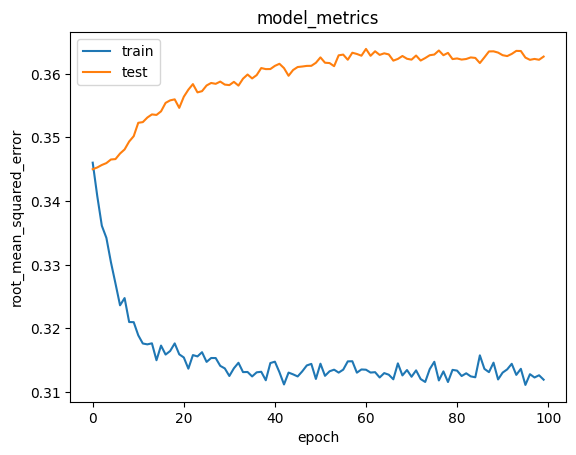

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
df_place = place_new
data_rating_place = pd.read_csv('/content/tourism_rating.csv')

# mengambil sample user secara acak
user_id = data_rating_place.User_Id.sample(1).iloc[0]
place_visited_by_user = data_rating_place[data_rating_place.User_Id == user_id]

# Menerapkan operator bitwise
place_not_visited = df_place[~df_place['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(encoded_tourism_id.keys()))
)

place_not_visited = [[encoded_tourism_id.get(x)] for x in place_not_visited]
user_encoder = encoded_user_id.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

Tujuan dari kode di atas adalah untuk memperoleh tempat wisata yang belum dikunjungi oleh seorang pengguna (user) tertentu berdasarkan data rating tempat wisata yang ada. Selanjutnya, melakukan prediksi untuk memberikan rekomendasi tempat wisata kepada user yang dipilih secara acak.

In [ ]:
ratings_result = model.predict(user_place_array).flatten()

top_ratings_indices = ratings_result.argsort()[-10:][::-1]
recommended_place_by_id = [
    encoded_tourism_id.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Top Place Ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_data_rows = df_place[df_place['id'].isin(top_place_user)]
for row in place_data_rows.itertuples():
    print(row.place_name, ':', row.category)

print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_place = df_place[df_place['id'].isin(recommended_place_by_id)]
for row in recommended_place.itertuples():
    print(row.place_name, ':', row.category)

13/13 [==============================] - 0s 4ms/step
Showing recommendations for users: 195
Top Place Ratings from user
--------------------------------
Ocean Ecopark : Taman_Hiburan
Mall Thamrin City : Pusat_Perbelanjaan
Taman Pelangi Yogyakarta : Taman_Hiburan
Jendela Alam : Taman_Hiburan
Upside Down World Bandung : Taman_Hiburan
--------------------------------
Top 10 place recommendation
--------------------------------
Jembatan Kota Intan : Budaya
Pasar Tanah Abang : Pusat_Perbelanjaan
Embung Tambakboyo : Taman_Hiburan
Candi Borobudur : Budaya
Panghegar Waterboom Bandung : Taman_Hiburan
Wot Batu : Cagar_Alam
Saung Angklung Mang Udjo : Budaya
Grand Maerakaca : Taman_Hiburan
GPIB Immanuel Semarang (Gereja Blenduk) : Tempat_Ibadah
La Kana Chapel : Taman_Hiburan
